# BASIC LINEAR MODEL: EDSA Apple Prices Challenge

#The data description and procedure of solving the defined  problem

### Importing neccesary libraries

In [1]:
# Importing Libraries

# Regression models
from sklearn.linear_model import LinearRegression

# Model slection
from sklearn.model_selection import train_test_split

# Preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Other
from scipy import stats
import numpy as np
import math
import pickle

# Confirmatory Data Analysis

### Loading and viewing data

First we'll load and take a look at he first few rows of our training and testing data

In [2]:
# Importing data from csv files using the read_csv() fuction in the pandas library

train = pd.read_csv('Data/df-train_set.csv')
test = pd.read_csv('Data/df-test_set.csv')

In [3]:
# Looking at the first 5 entries in the datasets to evaluate columns and identify numerical and categorical predictors

train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [29]:
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [4]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


In [5]:
apple_train = train[train.Commodities.str.contains("APPLE GOLDEN DELICIOUS")]
apple_train

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,NATAL,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-03-04,96.0,96.0,1920.0,20,240.0,53,8.00
64291,ORANGE FREE STATE,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-02-22,130.0,130.0,7280.0,56,1024.8,74,7.10
64297,CAPE,JE090,2M,9.0,APPLE GOLDEN DELICIOUS,2020-04-22,50.0,60.0,4540.0,89,801.0,793,5.67
64304,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-03-04,30.0,40.0,2140.0,70,770.0,0,2.78


In [6]:
apple_train.isna().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [7]:
apple_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


In [8]:
apple_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


# Feature Engineering

**Feature engineering** is the process of using domain knowledge to extract features from raw data. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

Looking at the columns of the dataset we see that there are two columns (Low_Price, High_Price) that contain the highest and lowest prices the products were sold at. We will add another column containing the difference between Highest and lowest prices.

In [9]:
apple_train["Price_Difference"] = apple_train.High_Price - apple_train.Low_Price

<ipython-input-9-5428201b4271>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_train["Price_Difference"] = apple_train.High_Price - apple_train.Low_Price


In [10]:
apple_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Price_Difference
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,20.0
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,0.0
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,0.0
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,40.0
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,0.0


In the dataset, the entries "Date" column is in string format. We will set this to a Datetime object and split the Date into day, month and year. We will also add day of the week to explore whether the day of the week has an impact on the price of the product.

In [11]:
apple_train['Date']= pd.to_datetime(apple_train['Date'])

<ipython-input-11-4a69661c783d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_train['Date']= pd.to_datetime(apple_train['Date'])


In [12]:
apple_train["Day"] = apple_train['Date'].map(lambda x: x.day)
apple_train["Month"] = apple_train['Date'].map(lambda x: x.month)
apple_train["Year"] = apple_train['Date'].map(lambda x: x.year)
apple_train["Day_Of_Week"] = apple_train["Date"].dt.dayofweek
apple_train.drop("Date", axis=1, inplace=True)

<ipython-input-12-59b9bb4b4ee3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_train["Day"] = apple_train['Date'].map(lambda x: x.day)
<ipython-input-12-59b9bb4b4ee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_train["Month"] = apple_train['Date'].map(lambda x: x.month)
<ipython-input-12-59b9bb4b4ee3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

!!!!!!!!!!! Dummy variable description !!!!!!!!!!!!!!!!!!!!

In [13]:
dummy_df = pd.get_dummies(apple_train)
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Price_Difference,Day,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Commodities_APPLE GOLDEN DELICIOUS
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,20.0,9,...,0,0,0,0,0,0,0,0,0,1
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,0.0,14,...,0,0,0,0,0,1,0,0,0,1
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0.0,16,...,0,0,0,0,0,0,1,0,0,1
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,40.0,4,...,0,1,0,0,0,0,0,0,0,1
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,0.0,28,...,0,1,0,0,0,0,0,0,0,1


In [14]:
dummy_df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Price_Difference,Day,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Commodities_APPLE GOLDEN DELICIOUS
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,...,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.0
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893,41.340676,15.866291,...,0.163422,0.272541,0.001025,0.087602,0.061475,0.118852,0.157787,0.008709,0.013320,1.0
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744,153.739828,8.705740,...,0.369845,0.445381,0.032001,0.282788,0.240262,0.323698,0.364634,0.092939,0.114669,0.0
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000,10.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000,30.000000,23.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000,1840.000000,31.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [15]:
column_titles = [col for col in dummy_df.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df=dummy_df.reindex(columns=column_titles)

In [16]:
# Target correlations with features
corrs = pd.DataFrame(dummy_df.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

,Correlation
avg_price_per_kg,1.000000
Container_M4183,0.403229
Size_Grade_1L,0.280966
Province_W.CAPE-BERGRIVER ETC,0.262051
Size_Grade_1X,0.251451
Container_EC120,0.188162
Size_Grade_1M,0.175779
Container_EF120,0.114297
Sales_Total,0.108473
Stock_On_Hand,0.105028


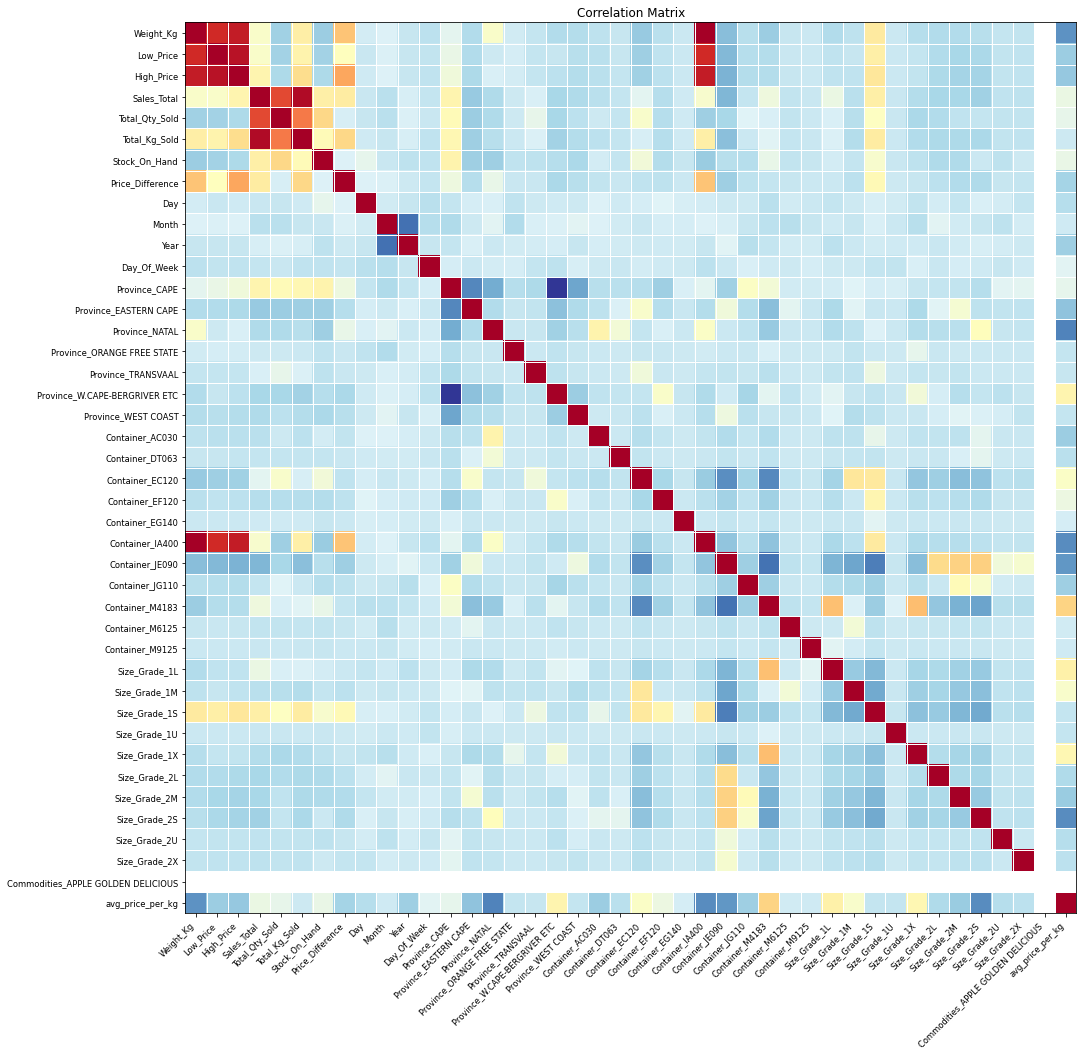

In [17]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);

plot_corr(dummy_df.corr(), xnames = dummy_df.corr().columns, ax = ax);

# Feature Selection

The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model.

Before we decide which features to use in our model, we should take a look at the distribution of our target variable.

E:\conda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

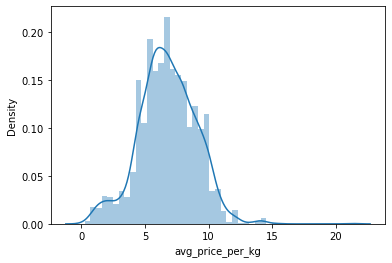

In [18]:
# target distribution
sns.distplot(dummy_df.avg_price_per_kg, kde=True)

# Training

In [22]:
dummy_df.shape

(1952, 42)

# Predicting on the test set

In [24]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [35]:
# Our model will be the same throughout, so will our y
model = LinearRegression(n_jobs=-1)
y = apple_train['avg_price_per_kg']
y.shape

(1952,)

In [36]:
# fit the model to the data and make predictions - OverallQual
X_train = dummy_df.values
fit_and_evaluate(model,X,y)

{'Train RMSE': 2.393067062459681e-11,
 'Train R^2': 1.0,
 'Test RMSE': 2.2596378322710885e-11,
 'Test R^2': 1.0}

In [37]:
# save the model
import pickle
model_load_path = "model.pkl"
with open(model_load_path,'rb') as file:
    mod = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'